In [271]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 6)

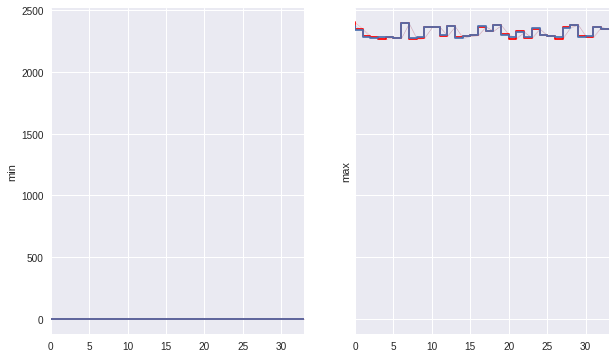

In [272]:
def predictor(ticker):
    """return dataframe that contains unique events for ticker, prediction and real value"""
    predictions = pd.DataFrame()
    for e_id, event in ticker.groupby("event_id"):
        d = pd.DataFrame({
            'event_id': event.event_id,
            'prediction_max': event.prediction_max.mean(),
            'real_max': event.real_max.mean(),
            'prediction_min': event.prediction_min.mean(),
            'real_min': event.real_min.mean(),
        })
        predictions = pd.concat([predictions, d])
    return predictions.drop_duplicates()

preds = predictor(ticker)
  
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.tsplot(preds.real_min, drawstyle="steps", color="red", ax=ax1)
sns.tsplot(preds.prediction_min, drawstyle="steps", ax=ax1, value = "min")
ax1.legend()

sns.tsplot(preds.real_max, drawstyle="steps", color="red", ax=ax2)
sns.tsplot(preds.prediction_max, drawstyle="steps", ax=ax2, value="max")
ax2.legend()

plt.show()

In [273]:
# cell for trying things out
event.columns

Index(['user_id', 'user_country_id', 'event_id', 'event_country_id',
       'ticker_id', 'prediction_min', 'prediction_max', 'real_min', 'real_max',
       'answer_created_at', 'event_finished_at', 'user_spended_time', 'error',
       'hours_left'],
      dtype='object')

In [274]:
# test the hypothesis that the dispersion is decreasing as time goes on
# use dispersion(timedelta(event_finished_at - answer_created_at))
# hypothesis: the dispersion will be smaller as time goes on

import maya
from datetime import timedelta

def to_hours(td):
    return round(td.total_seconds() / 3600)

def group_by_hour(df):
    """returns: dataframe with added column which contains hours before end"""
    df['hours_left'] = (df['event_finished_at'].apply(maya.parse).apply(maya.MayaDT.datetime) -
                        df['answer_created_at'].apply(maya.parse).apply(maya.MayaDT.datetime)).apply(to_hours)
    
    return df

df = group_by_hour(df)
df.sort_values('hours_left')

,user_id,user_country_id,event_id,event_country_id,ticker_id,prediction_min,prediction_max,real_min,real_max,answer_created_at,event_finished_at,user_spended_time,error,hours_left
14631,4a79559d-1e28-47fe-ab0b-19cdff34d94d,7e1c4c97-dba6-4fdf-8d19-b80fe0eecda4,96b63ef1-3f2f-4c18-9dd1-3f896e7dc150,927c2718-87c9-40b2-96bc-9c573e4a1bb2,c5e2ca55-3606-40ad-aae5-55be180a7de5,2288.750,2299.2500,2293.00000,2307.75000,2017-02-10 21:37:00,2017-02-09 13:57:00,None,8.50000,-32
14701,4a79559d-1e28-47fe-ab0b-19cdff34d94d,7e1c4c97-dba6-4fdf-8d19-b80fe0eecda4,481de98e-3bba-4587-bb47-c745f5c9ff8a,927c2718-87c9-40b2-96bc-9c573e4a1bb2,efddc0da-2e62-4e5a-b906-f9c7b98765c4,1239.850,1247.9000,1231.50000,1246.20000,2017-02-10 22:03:00,2017-02-09 13:57:00,None,-1.70000,-32
14909,4a79559d-1e28-47fe-ab0b-19cdff34d94d,7e1c4c97-dba6-4fdf-8d19-b80fe0eecda4,4f3d8998-f295-43fc-a840-f0f2616e8aec,927c2718-87c9-40b2-96bc-9c573e4a1bb2,a0c756e7-481a-4a9e-bed1-32db7cd40279,229.020,230.0000,229.52000,230.95000,2017-02-10 21:54:00,2017-02-09 14:17:00,None,0.95000,-32
14773,4a79559d-1e28-47fe-ab0b-19cdff34d94d,7e1c4c97-dba6-4fdf-8d19-b80fe0eecda4,d88fa7e3-d691-4c6d-bb47-7ef043e733fa,927c2718-87c9-40b2-96bc-9c573e4a1bb2,d6b807c0-2c66-4b3c-8a1b-fe690e8951c8,52.750,53.1800,52.75000,53.21000,2017-02-10 21:44:00,2017-02-09 13:57:00,None,0.03000,-32
21691,0ad88794-3a10-4fac-8ea1-2d9a4c4b3cb6,043ebed1-3332-4149-9c2a-cdda0aa8f041,0e6a658b-f691-4f74-b903-770bbe913ede,927c2718-87c9-40b2-96bc-9c573e4a1bb2,a0c756e7-481a-4a9e-bed1-32db7cd40279,236.200,236.6000,236.02000,236.95000,2017-03-01 12:09:35.828782,2017-02-28 14:20:00,None,0.35000,-22
1015,a4420cf2-7806-42ae-8d6c-ca91dca6f88d,043ebed1-3332-4149-9c2a-cdda0aa8f041,f5301bfa-b288-452d-91ca-e4060938b7c7,927c2718-87c9-40b2-96bc-9c573e4a1bb2,d6b807c0-2c66-4b3c-8a1b-fe690e8951c8,50.340,52.0100,51.72000,53.05000,2017-01-19 09:31:04.462099,2017-01-18 13:57:00,None,1.04000,-20
868,a4420cf2-7806-42ae-8d6c-ca91dca6f88d,043ebed1-3332-4149-9c2a-cdda0aa8f041,5be4bd8e-9112-4bfb-be7b-e4b82b83758c,927c2718-87c9-40b2-96bc-9c573e4a1bb2,efddc0da-2e62-4e5a-b906-f9c7b98765c4,1157.200,1201.3000,1201.80000,1216.30000,2017-01-19 09:31:31.182895,2017-01-18 13:57:00,None,15.00000,-20
15252,b0e198cc-55f4-4c8e-9209-5553dff80f76,043ebed1-3332-4149-9c2a-cdda0aa8f041,af581bb7-687c-4997-9a26-3a00735353f6,None,bc7efa09-265e-46b7-951e-6ec28c8f0e4f,945.000,1000.0000,950.00000,1043.21000,2017-02-10 18:32:00.106377,2017-02-10 06:50:00,None,43.21000,-12
22697,817a83a1-0f9c-49b8-a12d-6cca650f4e3b,043ebed1-3332-4149-9c2a-cdda0aa8f041,19edee89-7c1e-4f34-a2f5-7be5251e27b1,927c2718-87c9-40b2-96bc-9c573e4a1bb2,d6b807c0-2c66-4b3c-8a1b-fe690e8951c8,53.900,54.2000,53.72000,54.44000,2017-03-01 18:46:37.595985,2017-03-01 13:57:00,19,0.24000,-5
22009,817a83a1-0f9c-49b8-a12d-6cca650f4e3b,043ebed1-3332-4149-9c2a-cdda0aa8f041,a7a32651-cde3-493b-93ef-d707935f1eba,927c2718-87c9-40b2-96bc-9c573e4a1bb2,efddc0da-2e62-4e5a-b906-f9c7b98765c4,1252.000,1255.0000,1238.80000,1251.40000,2017-03-01 18:47:20.992353,2017-03-01 13:57:00,30,-3.60000,-5


In [275]:
# there are some answers after the event end.
# how many cheaters?
cheaters = df[df['hours_left'] <0]
cheaters.drop_duplicates("user_id")
print(len(cheaters))
print(len(set(cheaters['user_id'])))
cheaters.to_csv("time_travellers.csv")


41
13


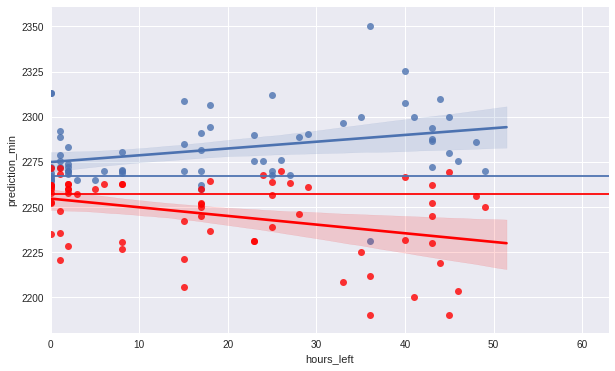

In [276]:
# filter out values
ndf = df[df['hours_left'] >= 0]
ticker = ndf.groupby('ticker_id').get_group(ticker_id)
event = ticker.groupby('event_id').get_group(event_id)
event.sort_values('hours_left')
sns.regplot('hours_left', "prediction_max", event)
sns.regplot('hours_left', 'prediction_min', event, color='red')
sns.tsplot(event['real_max'])
sns.tsplot(event['real_min'], color='red')
plt.show()



# todo

Сгруппировать все тикеры по времени, сколько они идут.
построить регрессию по всем событиям

назначить веса относительно ошибки.
Ошибка - регрессия в это время - реальное значение. 
Не забыть отнормировать.

сделать модуль, который принимает на вход датасет, отдает модель, которая принимает на вход предсказание и отдает его вес, в зависимости от времени, оставшегося до окончания



In [277]:
# ok. what if this data is all I have
# TODO: make linear regression model. Like , a and b for ax+b, where x is time

def normalize_df(df):
    to_norm = df[['real_min', 'prediction_min']]
    norm_df = df.copy()
    
    norm = to_norm / to_norm.mean()
    
    norm_df[['real_min', 'prediction_min']] = norm
    
    return norm_df


ndf = df[df['hours_left'] >= 0]
# ndf = normalize_df(ndf)
ticker = ndf.groupby('ticker_id').get_group(ticker_id)
event = ticker.groupby('event_id').get_group(event_id)
event.sort_values('hours_left')

event = get_event(df)
sns.regplot('hours_left', 'prediction_min', event, color='red')
sns.tsplot(event['real_min'], color='black')
plt.show()



TypeError: get_event() takes 0 positional arguments but 1 was given

In [ ]:
# https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb

import statsmodels.formula.api as smf

event.sort_values('hours_left')

lm = smf.ols(formula='hours_left ~ prediction_min', data=event[['hours_left', 'prediction_min']]).fit()
lm.params


In [ ]:
from sklearn import linear_model


event.sort_values('hours_left')

regr = linear_model.LinearRegression()

hours_reshaped = event.hours_left.reshape(len(event.hours_left), 1)


regr.fit(hours_reshaped, event['prediction_min'])

p = regr.predict(hours_reshaped)

# print(p.max())
# sns.tsplot(prediction)


# ax + b

y = event.hours_left * regr.coef_ + regr.intercept_

event['regression'] = y

event['error'] = event['prediction_min'] - y

sns.regplot(event.hours_left, event.prediction_min)
sns.regplot(event.hours_left, event.regression, color='red')

# I did it!

In [ ]:
# now, with normalization

ndf = df[df['hours_left'] >= 0]
ndf = normalize_df(ndf)

ticker = ndf.groupby('ticker_id').get_group(ticker_id)
event = ticker.groupby('event_id').get_group(event_id)
event.sort_values('hours_left')

event.sort_values('hours_left')

def get_regression(event):
    regr = linear_model.LinearRegression()

    hours_reshaped = event.hours_left.reshape(len(event.hours_left), 1)

    regr.fit(hours_reshaped, event['prediction_min'])

    y = event.hours_left * regr.coef_ + regr.intercept_

    event['regression'] = y
    
    return event

event = get_regression(event)
sns.regplot(event.hours_left, event.prediction_min)
sns.regplot(event.hours_left, event.regression, color='red')

In [ ]:
# now, with aggregated data

time_group = ticker[ticker['hours_left'] <= 48]
time_group.sort_values('hours_left')


event = get_regression(time_group)
sns.regplot(event.hours_left, event.prediction_min)
sns.regplot(event.hours_left, event.regression, color='red')
# sns.tsplot([time_group.real_min.mean() for _ in len(time_group)])


In [ ]:
# group by hour
# coef = 1 - (regr(x) - real(x))

def normalize_by_real_min(series, name='real_min'):
    return series[name] / 2 * series.real_min.mean()

event_id = "bf8aa2ad-4ecb-4e5c-bb9d-a9b095a1ccc6"
event = df.groupby('event_id').get_group(event_id)

def get_weights(event):
    for h in event.groupby('hours_left'):
        mean_error = h['regression'].mean() - h['real_min'].mean()
        print(h['regression'].max() - h['regression'].min())
        h['weight'] = 1 - mean_error
    return event


get_weights(event)
        

In [ ]:
# rescue code!

def rescue_code(function):
    import inspect
    get_ipython().set_next_input("".join(inspect.getsourcelines(function)[0]))

In [ ]:
rescue_code(get_weight)

In [ ]:
def get_weight(event, hours_left):
    """returns weight proportional to error"""
    errs = get_by_value(event, 'hours_left', hours_left)
    return 1 - (errs.error.mean()) ** 2


In [ ]:
import types
print([f for f in globals().values() if type(f) == types.FunctionType])

In [ ]:
rescue_code(normalize)

In [ ]:
def normalize(series):
    return series / 2 * series.mean()


In [ ]:
rescue_code(get_weights)

In [ ]:
def get_weights(event):
    for h in event.group_by('hours'):
        mean_error = h['regression'].mean() - h['real_min'].mean()
        h['weight'] = 1 - mean_error
    return event


In [ ]:
rescue_code(get_mean_error_by_hour)

In [ ]:
def get_mean_error_by_hour(event):
    event.sort_values('hours_left')
    errs = [event[event['hours_left'] == i].error.mean() for i in range(event.hours_left.max())]
    errsdict = {'hours_left':range(event.hours_left.max()), 'mean_error': errs}
    errsdf = pd.DataFrame(errsdict)
    return errsdf


In [ ]:
rescue_code(get_by_value)

In [ ]:
def get_by_value(df, name, value):
    return df[df[name] == value]


In [ ]:
rescue_code(group_by_hour)

In [ ]:
def group_by_hour(df):
    """returns: dataframe with added column which contains hours before end"""
    df['hours_left'] = (df['event_finished_at'].apply(maya.parse).apply(maya.MayaDT.datetime) -
                        df['answer_created_at'].apply(maya.parse).apply(maya.MayaDT.datetime)).apply(to_hours)
    
    return df


In [ ]:
# group by hour
# coef = 1 - (regr(x) - real(x))

def normalize_by_real_min(series, name='real_min'):
    return series[name] / 2 * series.real_min.mean()

def get_event(df):
    event_id = "bf8aa2ad-4ecb-4e5c-bb9d-a9b095a1ccc6"
    event = df.groupby('event_id').get_group(event_id)
    return event
    


In [ ]:
import warnings
warnings.simplefilter('ignore')

event = get_event()
event = get_regression(event)


def get_weights(event):
    event['weight'] = 1 - (event['regression'] - event['real_min'])**2
    return event


get_weights(event)

In [ ]:
def normalize(df):
    return (df - df.mean()) / (df.max() - df.min())

def norm_by_pred_min(df):
    return (df - df.prediction_min.mean()) / (df.prediction_min.max() - df.prediction_min.min())

test = norm_by_pred_min(event[['prediction_min', 'real_min']])
# test['real_min'] = 1 - event['real_min'] / event.prediction_min.mean() 
# test.max() - test.min()

test['hours_left'] = event.hours_left
test.sort_values('hours_left')
sns.regplot('hours_left', 'prediction_min', test, color='red')
sns.tsplot(test['real_min'], color='black')

In [ ]:

sns.regplot('hours_left', 'prediction_min', event, color='red')
sns.tsplot(event['real_min'], color='black')

In [ ]:
test
test = get_regression(test)
test = get_weights(test)
test.max() - test.min()
test.max()

In [ ]:
test['weighted'] = test['prediction_min'] * test['weight']

test['prediction_max'] = event.predict


test['y_baseline_min'] = test.prediction_min.mean()
test['y_baseline_max'] = test.prediction_max.mean()

test['y_weighted_min'] = NotImplemented

test['y_true_min'] = test.real_min
test['y_true_max'] = test.real_max

plot_ticker(df)

In [315]:
event = get_event()
# event = group_by_hour(event)
event.hours_left

def norm_by(df, what_to, by):
    by = df[by].copy()
    for name in what_to:
        print('norming {}'.format(name))
        df[name] = (df[name] - by.mean()) / (by.max() - by.min())
    
    return df
    # return (df - df[name].mean()) / (df[name].max() - df[name].min())

weighted = event[['prediction_min', 'real_min', 'hours_left']]
weighted = norm_by(weighted, ['prediction_min', 'real_min'], 'prediction_min')
weighted = get_regression(weighted)
weighted = get_weights(weighted)
weighted
# (weighted['prediction_min'] - df['real_min']

norming prediction_min
norming real_min


,prediction_min,real_min,hours_left,regression,error,weight
529,-0.327658,0.141597,44,-0.148919,-0.178739,0.915600
530,0.287849,0.141597,45,-0.154795,0.442644,0.912152
531,0.052793,0.141597,49,-0.178299,0.231092,0.897666
532,0.127878,0.141597,48,-0.172423,0.300301,0.901391
533,-0.514944,0.141597,46,-0.160671,-0.354273,0.908634
534,-0.682141,0.141597,45,-0.154795,-0.527346,0.912152
535,0.080843,0.141597,43,-0.143043,0.223886,0.918980
536,-0.559652,0.141597,41,-0.131291,-0.428361,0.925532
537,-0.007349,0.141597,43,-0.143043,0.135694,0.918980
538,-0.191818,0.141597,43,-0.143043,-0.048775,0.918980


In [338]:
def average(event):
    average = (event.prediction_min * 1).sum() / len(event)
    return average

def weighted_average(event):
    weighted_average = (event.prediction_min * event.weight).sum() / event.weight.sum()
    return weighted_average

# weighted_average(weighted)
average(weighted)

event['weight'] = weighted['weight']
weighted_average(event)
# average(event)
# event.prediction_min.mean()

print(average(event))
print(weighted_average(event))
print(event.real_min.mean())

2245.69
2245.9377525
2257.25
